In [20]:
; ls

404.ipynb
Manifest.toml
Project.toml
README.md
Untitled.ipynb
about_lectures.ipynb
continuous_time
dynamic_programming
dynamic_programming_squared
getting_started_julia
index.ipynb
index_postgrad.ipynb
index_toc.ipynb
index_undergrad.ipynb
more_julia
multi_agent_models
postBuild
search.ipynb
status.ipynb
time_series_models
tools_and_techniques
troubleshooting.ipynb
untitled.txt
zreferences.ipynb


In [21]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia",version="0.8.0")

Activated /Users/Shane/Dropbox/GitHub/quantecon-notebooks-julia/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [22]:
using LinearAlgebra, Statistics

In [27]:
randn()

0.4971580046377174

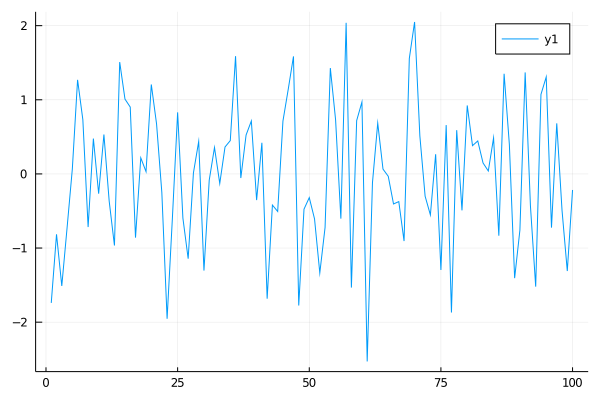

In [28]:
using Plots
gr(fmt=:png);

n=100
ϵ = randn(n)
plot(1:n,ϵ)

In [32]:
typeof(ϵ)

Array{Float64,1}

In [34]:
ϵ[1:5]

5-element Array{Float64,1}:
 -1.7401321136875123
 -0.8149944405756581
 -1.5109566216487826
 -0.7311129557573408
  0.06468760538585194

In [43]:
eachindex(ϵ)

Base.OneTo(100)

In [36]:
M = [1 2;3.5 4]
typeof(M)

Array{Float64,2}

In [41]:
# poor style
n=100
ϵ = zeros(n)
for i ∈ 1:n
    ϵ[i] = randn()
end

In [44]:
# better style
n=100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i] = randn()
end

In [51]:
ϵ_sum = 0.0
m=5
for ϵ_val ∈ ϵ[1:m]
    ϵ_sum = ϵ_sum + ϵ_val
end
ϵ_mean = ϵ_sum / m

0.24874986667008958

In [53]:
ϵ_mean1 = mean(ϵ[1:m]);
ϵ_mean2 = sum(ϵ[1:m])/m

0.24874986667008958

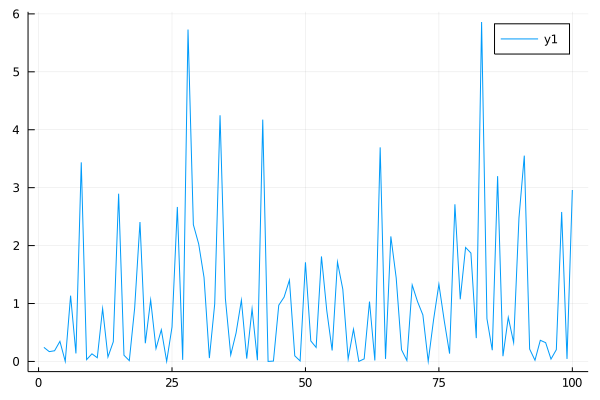

In [59]:
#poor style
function generatedata(n)
    ϵ = zeros(n)
    for i ∈ eachindex(ϵ)
        ϵ[i] = (randn())^2
    end
    return ϵ
end

data = generatedata(100)
plot(data)

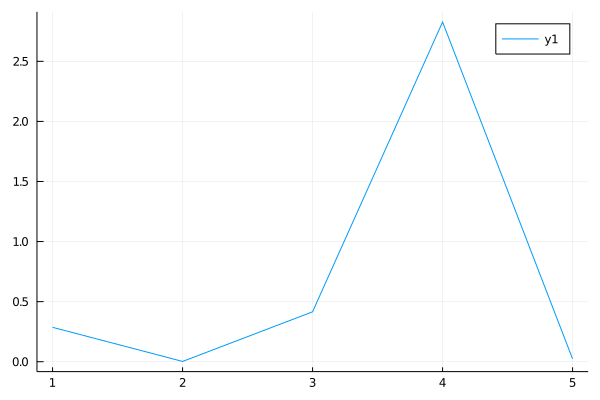

In [60]:
# better style
function generatedata(n)
    ϵ = randn(n)
    
    for i ∈ eachindex(ϵ)
        ϵ[i] = ϵ[i]^2
    end
    
    return ϵ
end
data = generatedata(5)
plot(data)

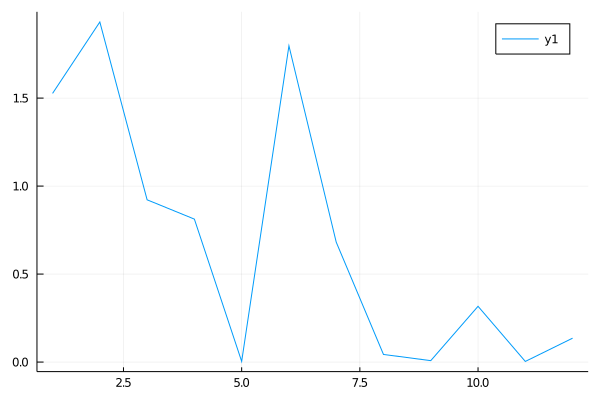

In [62]:
# best style
function generatedata(n)
    ϵ = randn(n)
    return ϵ.^2
end
data=generatedata(12)
plot(data)

In [63]:
# alternative - function on single line
generatedata(n) = rand(n).^2
data = generatedata(5)

5-element Array{Float64,1}:
 0.6521953265446738
 0.6262665868442118
 0.3108363821344108
 0.24524253675995475
 0.04140648645935907

In [64]:
# good style
f(x) = x^2
generatedata(n) = f.(rand(n))
data = generatedata(5)

5-element Array{Float64,1}:
 0.2536293075988371
 0.4100165073930972
 0.2553363957864079
 0.5485193645286144
 0.5875148554263897

In [65]:
generatedata(n,gen) = gen.(randn(n))

f(x) = x^2
data = generatedata(5,f)

5-element Array{Float64,1}:
 0.04750430394947183
 0.14514951955170613
 0.1825308300171384
 3.582090006821618
 1.6892242399210757

In [66]:
?randn

search: randn lowrankdowndate lowrankdowndate! RankDeficientException rand



```
randn([rng=GLOBAL_RNG], [T=Float64], [dims...])
```

Generate a normally-distributed random number of type `T` with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers. The `Base` module currently provides an implementation for the types [`Float16`](@ref), [`Float32`](@ref), and [`Float64`](@ref) (the default), and their [`Complex`](@ref) counterparts. When the type argument is complex, the values are drawn from the circularly symmetric complex normal distribution of variance 1 (corresponding to real and imaginary part having independent normal distribution with mean zero and variance `1/2`).

# Examples

```jldoctest
julia> using Random

julia> rng = MersenneTwister(1234);

julia> randn(rng, ComplexF64)
0.6133070881429037 - 0.6376291670853887im

julia> randn(rng, ComplexF32, (2, 3))
2×3 Array{Complex{Float32},2}:
 -0.349649-0.638457im  0.376756-0.192146im  -0.396334-0.0136413im
  0.611224+1.56403im   0.355204-0.365563im  0.0905552+1.31012im
```


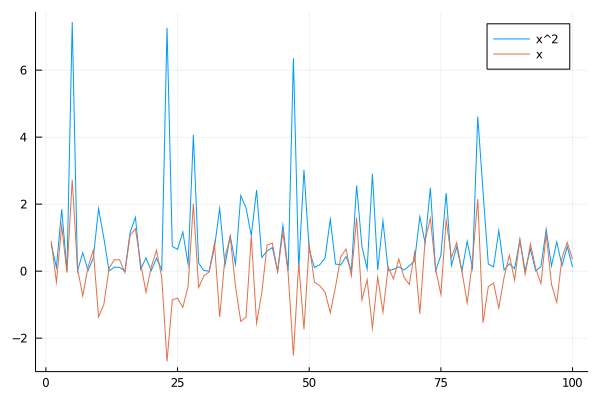

In [76]:
# direct solution with broadcasting, small user-defined function
n=100
f(x) = x^2

x=randn(n)
plot(f.(x),label="x^2")
plot!(x,label="x")

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1278


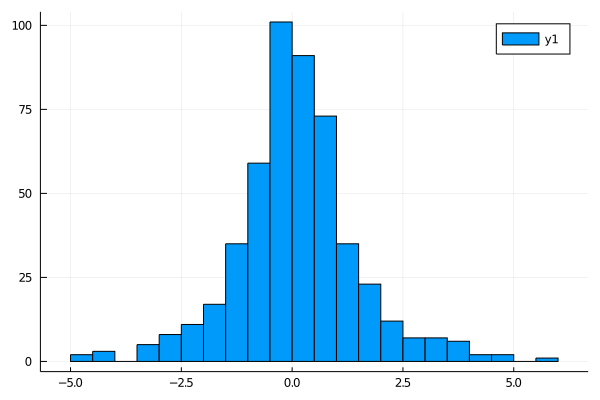

In [77]:
using Distributions

function plothistogram(distribution,n)
    ϵ = rand(distribution,n)
    histogram(ϵ)
end

lp = Laplace()
plothistogram(lp,500)

In [79]:
# poor style while loop for fixed point
p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_iv = 0.8 # initial condition

# setup algorithm
v_old = v_iv
normdiff = Inf
iter = 1 

while normdiff > tolerance && iter <= maxiter
    v_new = p + β*v_old
    normdiff = norm(v_new - v_old)
    
    #replace and continue
    v_old = v_new
    iter = iter + 1
end
println("Fixed point = $v_old, and |f(x)-x| = $normdiff in $iter iterations")

Fixed point = 9.999999173706609, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations


In [81]:
# using a for loop

# setup algorithm
v_old = v_iv
normdiff = Inf
iter =1 

for i ∈ 1:maxiter
    v_new = p +β*v_old
    normdiff = norm(v_new - v_old)
    if normdiff < tolerance #check convergence
        iter=i
        break # converged, exit loop
    end
    #replace and continue
    v_old = v_new
end
println("Fixed point = $v_old, and |f(x)-x| = $normdiff in $iter iterations")


Fixed point = 9.999999081896231, and |f(x)-x| = 9.181037796679448e-8 in 154 iterations


In [85]:
# better but still poor style - sequential code is slow, easily remedied by being wrapped in a function

function v_fp(β,p, v_iv,tolerance,maxiter)
    
    #setup the algorithm
    v_old = v_iv
    normdiff = Inf
    iter = 1 
    while normdiff > tolerance && iter <= maxiter
        v_new = p + β * v_old
        normdiff = norm(v_new - v_old)
        
        #replace and continue
        v_old = v_new
        iter = iter + 1
    end
    return (v_old, normdiff, iter) # return tuple
end

#create values
p = 1.0
β = 0.9
maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 #initial condition

vstar, normdiff, iter = v_fp(β,p,v_initial,tolerance,maxiter)
println("Fixed point = $v_old, and |f(x)-x| = $normdiff in $iter iterations")
        

Fixed point = 9.999999081896231, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations


In [93]:
# better style - set up a fixedpoint finding algorithm

function fixedpointmap(f,iv,tolerance,maxiter)
    #setup algorithm
    x_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        x_new = f(x_old)
        normdiff = norm(x_new - x_old)
        
        # replace and continue
        x_old = x_new
        iter = iter + 1
    end
    return(v_old, normdiff, iter)
end

# define parameters
p = 1.0
β = 0.9
f(v) = p + β * v

maxiter = 1000
tolerance = 1.0E-7
v_initial = 0.8 # intial condition

v_star, normdiff, iter = fixedpointmap(f, v_initial, tolerance, maxiter)
println("Fixed point = $v_star, and |f(x)-x| = $normdiff in $iter iterations")


Fixed point = 9.999999081896231, and |f(x)-x| = 9.181037796679448e-8 in 155 iterations


In [100]:
# good style 
function fixedpointmap(f; iv, tolerance = 1E-7, maxiter = 1000)
    # set up  the algorithm
    v_old = iv
    normdiff = Inf
    iter = 1
    while normdiff > tolerance && iter <= maxiter
        v_new = f(v_old)
        normdiff = norm(v_new - v_old)
        v_old = v_new 
        iter = iter + 1
    end
    return (value = v_old, normdiff = normdiff, iter = iter) # named tuple
end

    # define parameters
    p = 1.0
    β = 0.9
    f(v) = p + β * v
    
    sol = fixedpointmap(f, iv = 0.8, tolerance = 1.0E-8)
    println("Fixed point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 9.999999918629035, and |f(x)-x| = 9.041219328764782e-9 in 177 iterations


In [101]:
# find fixed point of logistic function

r = 2.0
f(x) = r * x * (1-x)

sol = fixedpointmap(f, iv = 0.8)
println("Fixed point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = 0.4999999999999968, and |f(x)-x| = 3.979330237546819e-8 in 7 iterations


In [103]:
# using a package
using NLsolve

p = 1.0
β = 0.9
f(v) = p .+ β * v # broadcast the +
sol = fixedpoint(f,[0.8])
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero)-sol.zero)) in $(sol.iterations) iterations")


Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


In [104]:
# best style using a package

p = 1.0
β = 0.9
iv = [0.8]

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero)-sol.zero)) in $(sol.iterations) iterations")

Fixed point = [9.999999999999972], and |f(x) - x| = 3.552713678800501e-15 in 3 iterations


In [107]:
# use BigFloat for arbitrary precision

p = 1.0
β = 0.9
iv = [BigFloat(0.8)] # high precision

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero)-sol.zero)) in $(sol.iterations) iterations")


Fixed point = BigFloat[10.00000000000000222044604925031357388532909931412848377287867809936811555686155], and |f(x) - x| = 0.0 in 3 iterations


In [109]:
BigFloat[0.8]

1-element Array{BigFloat,1}:
 0.8000000000000000444089209850062616169452667236328125

In [110]:
# Apply fixedpointmap to multivariate map

p = [1.0, 2.0]
β = 0.9
iv = [0.8, 2.0]

f(v) = p .+ β * v

sol = fixedpointmap(f, iv=iv, tolerance = 1.0E-8)
println("Fixed point = $(sol.value), and |f(x)-x| = $(sol.normdiff) in $(sol.iter) iterations")

Fixed point = [9.999999961080519, 19.999999923853192], and |f(x)-x| = 9.501826248250528e-9 in 184 iterations


In [111]:
# use package 

p = [1.0, 2.0, 0.1]
β = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v-> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero)-sol.zero)) in $(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929], and |f(x) - x| = 6.661338147750939e-16 in 3 iterations


In [112]:
# use staticArrays.jl which provides an efficient implementation for small arrays and matrices

using NLsolve, StaticArrays
p = @SVector [1.0, 2.0, 0.1]
β = 0.9
iv = [0.8, 2.0, 51.0]
f(v) = p .+ β * v

sol = fixedpoint(v -> p .+ β * v, iv)
println("Fixed point = $(sol.zero), and |f(x) - x| = $(norm(f(sol.zero)-sol.zero)) in $(sol.iterations) iterations")

Fixed point = [10.0, 20.000000000000004, 0.9999999999999929], and |f(x) - x| = 6.661338147750939e-16 in 3 iterations


In [115]:
# Exercise 1

function factorial2(n)
    k=1
    for i ∈ 1:n
        k = k * i
    end
    return k
end

factorial2(3)


6

In [128]:
# Exercise 2

function binomial_rv(n,p)
    count = 0
    U = rand(n)
    for i ∈ 1:n
        if U[i] < p
            count += 1
        end
    end
    return count
end

n=60
p=0.7

binomial_rv(n,p)

48

In [138]:
# Exercise 3

n = 10000
count = 0

for i ∈ 1:n
    x, y = rand(2)
    r = ((x-0.5)^2 + (y-0.5)^2)^(0.5) # distance from center of circle
    if r < 0.5 # radius
        count+=1
    end
end

pi_estimate = (count/n)/0.5^2

println("Estimated pi = $pi_estimate")

Estimated pi = 3.1228


In [147]:
# Exercise 4

function flipcoin(n)
    payoff = 0
    count = 0
    x = rand(n)
    for i ∈ eachindex(x)
        if x[i] <= 0.5
            count += 1
        else
            count = 0
        end
        print(count)
        if count >= 3
            payoff = 1
        end
    end
    return (count,payoff)
end
    
# parameters
n = 10
flipcoin(n)



1001001200

(0, 0)

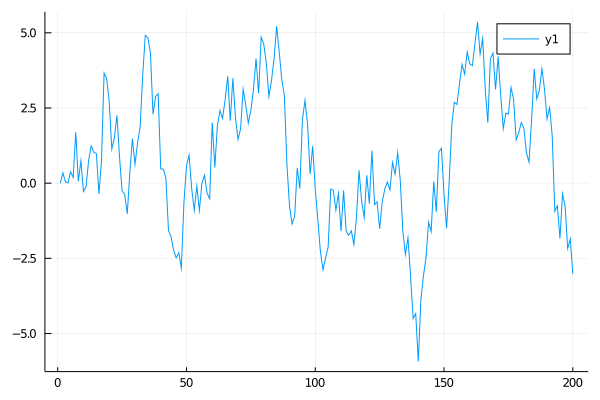

In [150]:
# Exercise 5

# parameters
n = 200
α = 0.9

x = zeros(n)

for i ∈ 1:n
    x[i+1] = α * x[i] + randn()
end
plot(x)

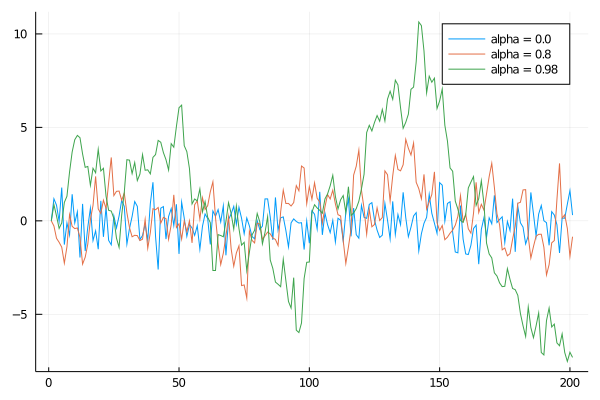

In [328]:
# Exercise 6

αs = [0.0, 0.8, 0.98]
n = 200
p = plot() # naming a plot to add to

for α in αs
    x = zeros(n + 1)
    x[1] = 0.0
    for t in 1:n
        x[t+1] = α * x[t] + randn()
    end
    plot!(p, x, label = "alpha = $α") # add to plot p
end
p # display plot


In [313]:
# Exercise 7
function firstpassage(threshold; tmax=100, α = 1.0, σ =0.2)
    x = zeros(tmax)
    x[1] = 1.0
    x[tmax] = 0.0
    for i in 2:tmax
        x[i] = α * x[i-1] + σ * randn()
        if x[i] < threshold # checks threshold
            return i # leaves function, returning draw number
        end
    end
    return tmax # if here, reached maxdraws
end

# parameters
tmax = 200
σ = 0.2
αs = [0.8, 1.0, 1.2]
threshold = 0.0

# sample using firstpassage
nsamp = 100
averages = zeros(0)

for α ∈ αs
    draws = zeros(nsamp)
    for i ∈ 1:100
        draws[i] = firstpassage(threshold, tmax=tmax, α = α, σ = σ)
    end
    average = mean(draws)
    push!(averages,average)
#    histogram!(h, draws, labels = "alpha = $α", bins= 20) # add to histogram h
end
averages
# h

3-element Array{Float64,1}:
  11.3
 104.0
 200.0

In [327]:
# Exercise 8a

function f_prime(f; x0 = 2)
    
    # intialise loop
    crit = 1
    iter = 1
    del = 0.1
    normdiff = Inf
    
    fd_initial = (f(x0+del)-f(x0))/del
    fd_old = fd_initial
    
    while crit > 1.0E-8 && iter < 1000
        
        del = del/2 # shrink change
        fd_new = (f(x0+del)-f(x0))/del #calculate derivative
        
        crit =  norm(fd_new - fd_old) #how large is the change in derivative?
        
        # continuation 
        iter = iter + 1
        fd_old = fd_new
    end
    return fd_old
end

# test with polynomial function 
f(x) = (x-1)^3
x0 = 2

derivative = f_prime(f,x0=2)
    
# Newton Raphson algorithm

function NewtonRaphson(f, f_prime; x0 = 2, tolerance =1.0E-8 , maxiter = 1000)
    
    #initialise loop
    iter = 1
    normdiff = Inf
    
    x_old = x0 # starting point
    f_old = f(x0)
    
    while normdiff > tolerance && iter < maxiter
        
        fd = f_prime(f, x0 = x_old) # get derivative
        
        step = f(x_old)/fd # compute step
        
        x_new = x_old - step # compute expression to iterate over
        
        normdiff = norm(x_new - x_old)# do we converge?
        
        # continuation
        iter = iter+1
        x_old = x_new
    end
    return (root = x_old, normdiff = normdiff, iter = iter )
end

# peform Newton Raphson algorithm
f(x) = (x-1)^3
x0 = 2

sol = NewtonRaphson(f,f_prime, x0 = x0, tolerance =1.0E-8 , maxiter = 1000 )

println("root = $(sol.root), and |f(x) - x| = $(sol.normdiff) in $(sol.iter) iterations")


root = 1.000003041983481, and |f(x) - x| = 9.942122680683951e-9 in 200 iterations
